In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

In [60]:
# parameters
duration = 5            # duration in seconds
fs = 1000               # sampling rate in Hz (samples per second)
f = 2                   # frequency of the sine wave in Hz
amplitude = 1           # amplitude of the sine wave


In [61]:
# time vector
t = np.linspace(0, duration, int(fs*duration), endpoint=False)
ts = np.linspace(0, duration, int(fs*duration), endpoint=False)
# sine wave
y = amplitude * np.sin(2 * np.pi * f * t)
ys = amplitude * signal.sawtooth(2 * np.pi * (f-0.5) * t)

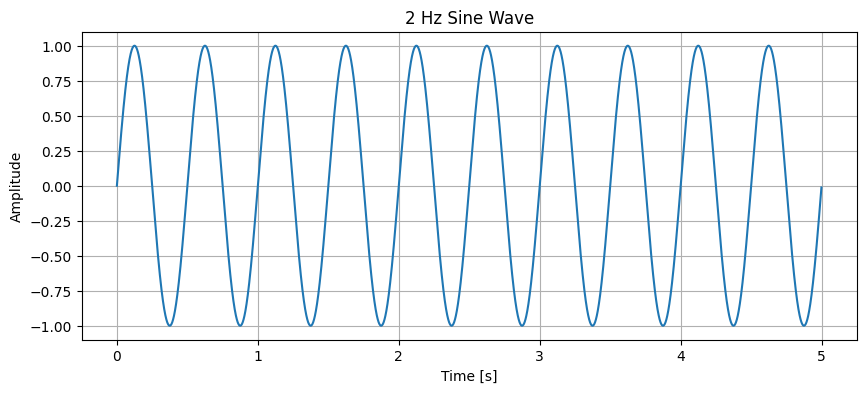

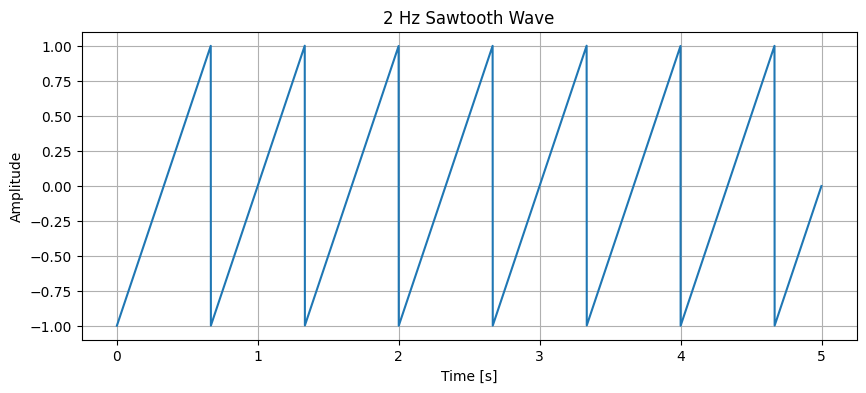

In [62]:
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title(f'{f} Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(t, ys)
plt.title(f'{f} Hz Sawtooth Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [63]:
y_combined_a = y + ys
y_combined_b = 0.5*y + 2*ys

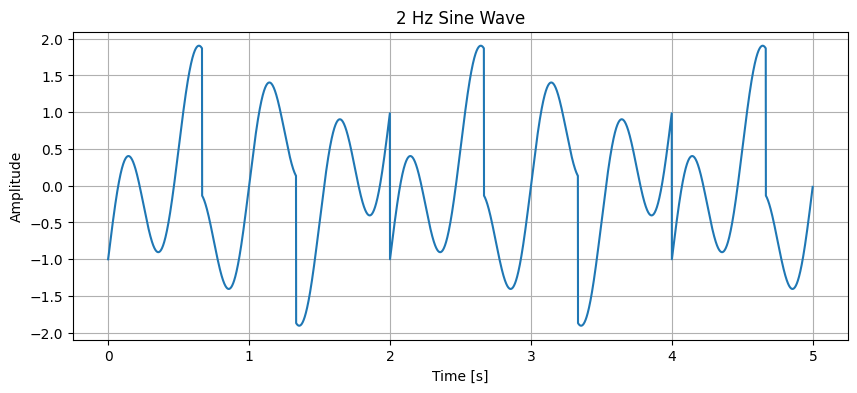

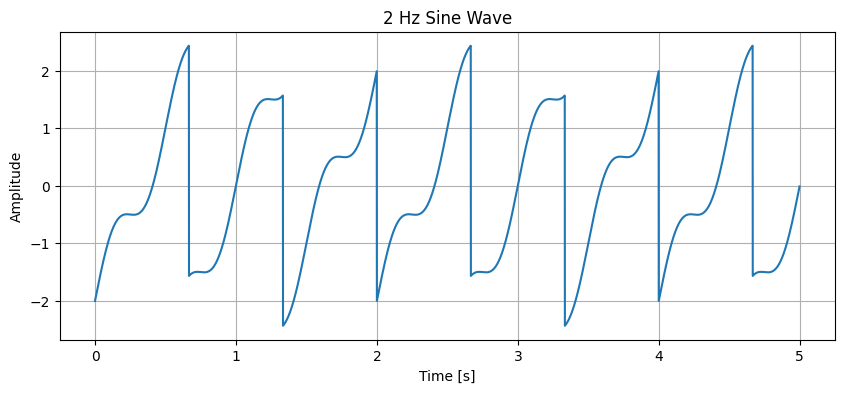

In [64]:
plt.figure(figsize=(10, 4))
plt.plot(t, y_combined_a)
plt.title(f'{f} Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(t, y_combined_b)
plt.title(f'{f} Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [65]:
# FastICA requires the lists to be stacked next to eachother in columns, this is done here
X = np.c_[y_combined_a, y_combined_b].T
ica = FastICA(n_components=2)
S_estimated = ica.fit_transform(X.T).T 

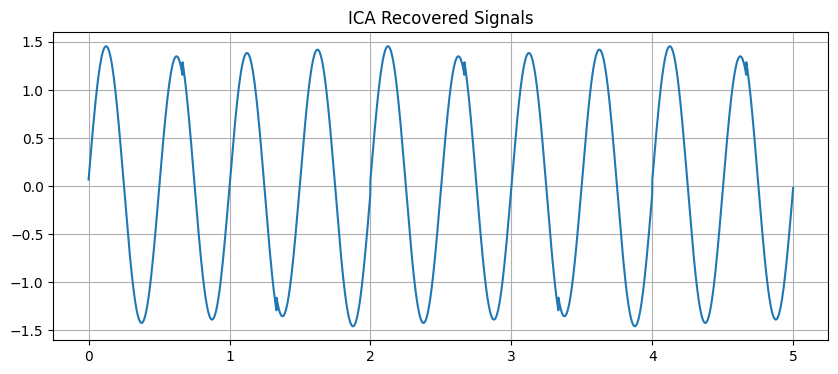

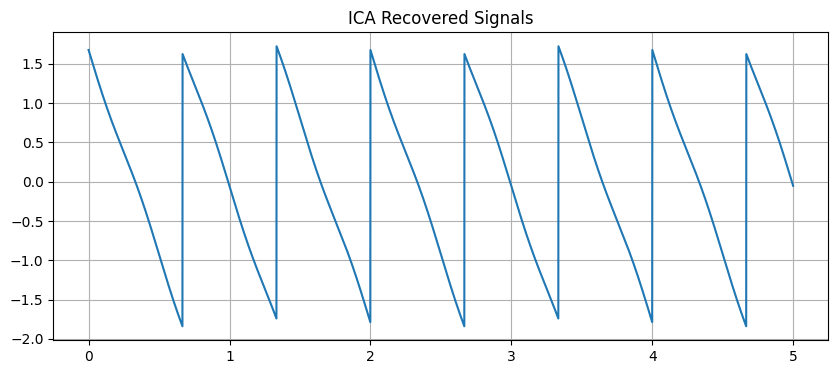

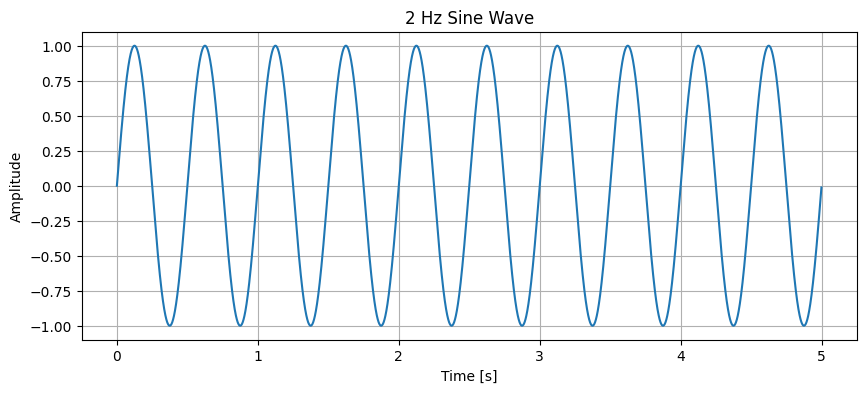

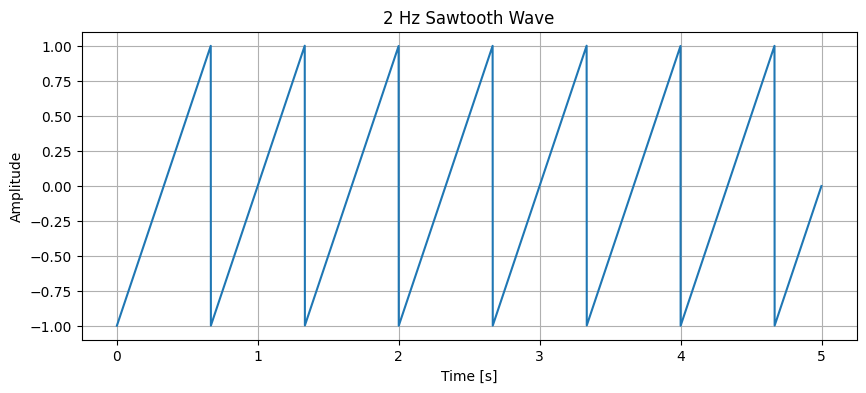

In [66]:
plt.figure(figsize=(10, 4))
plt.plot(t, S_estimated[0], label='Recovered 1')
plt.title('ICA Recovered Signals')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(t, S_estimated[1], label='Recovered 2')
plt.title('ICA Recovered Signals')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title(f'{f} Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(t, ys)
plt.title(f'{f} Hz Sawtooth Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()